In [1]:
# Set up the environment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
%matplotlib inline

In [2]:
# Upload the data
# data will contain everything, names and locations
# df will contain the features used in the modeling
data = pd.read_csv('data/processed/DecisionTreeData.csv', index_col=0)
data.sort_index(inplace=True)
data = data.loc[data.Year > 2009]
data.head()

,OPEID,INSTNM,CITY,NUMBRANCH,PREDDEG,HIGHDEG,CONTROL,region,ADM_RATE,UGDS,...,Year,NetPrice,Cost,EnrollmentBins,TuitionBins,ExpenditureBins,FacultyBins,Complete,RetentionFT,RetentionPT
47931,00100200,alabama a & m university,Normal,1,3,4,1.0,5.0,0.5129,4930.0,...,2010,8190.0,13762.0,xl,high,high,high,0.3306,0.7457,0.5000
47932,00105200,university of alabama at birmingham,Birmingham,1,3,4,1.0,5.0,0.8243,10661.0,...,2010,12838.0,18003.0,xl,high,highest,highest,0.4108,0.7997,0.7000
47933,02503400,amridge university,Montgomery,1,3,4,2.0,5.0,0.7143,370.0,...,2010,16546.0,20700.0,medium,highest,med,low,0.2308,0.8000,NaN
47934,00105500,university of alabama at huntsville,Huntsville,1,3,4,1.0,5.0,0.6614,5828.0,...,2010,7752.0,17064.0,xl,high,high,highest,0.4364,0.7545,0.5385
47935,00100500,alabama state university,Montgomery,1,3,4,1.0,5.0,0.4372,4882.0,...,2010,4061.0,14390.0,xl,high,high,high,0.2399,0.6352,0.4167


In [3]:
#df contains just the feature to train the model on
to_drop = ['OPEID', 'INSTNM', 'CITY', 'HIGHDEG', 'ADM_RATE', 'NetPrice', 'region','EnrollmentBins',\
           'TuitionBins','ExpenditureBins','FacultyBins', 'AVGFACSAL', 'RetentionPT', 'PCTFLOAN', 'Year']
df = data.drop(to_drop, axis=1)
df.head()

,NUMBRANCH,PREDDEG,CONTROL,UGDS,CURROPER,TUITFTE,INEXPFTE,PFTFAC,UG25abv,COMP_ORIG_YR4_RT,WDRAW_ORIG_YR4_RT,ENRL_ORIG_YR4_RT,DEBT_MDN,Cost,Complete,RetentionFT
47931,1,3,1.0,4930.0,True,6746.0,6601.0,0.8263,0.1308,0.228753,0.233519,0.162828,19000.0,13762.0,0.3306,0.7457
47932,1,3,1.0,10661.0,True,6343.0,16090.0,0.9298,0.2592,0.391520,0.191249,0.115922,15296.0,18003.0,0.4108,0.7997
47933,1,3,2.0,370.0,True,11499.0,4879.0,0.5000,0.8869,0.376471,0.300000,0.041270,13853.0,20700.0,0.2308,0.8000
47934,1,3,1.0,5828.0,True,6548.0,8379.0,0.6326,0.2422,0.350095,0.167932,0.120493,15000.0,17064.0,0.4364,0.7545
47935,1,3,1.0,4882.0,True,6937.0,7386.0,0.6216,0.1194,0.094878,0.363213,0.115832,16500.0,14390.0,0.2399,0.6352


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30682 entries, 47931 to 78616
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   NUMBRANCH          30682 non-null  int64  
 1   PREDDEG            30682 non-null  int64  
 2   CONTROL            30682 non-null  float64
 3   UGDS               30682 non-null  float64
 4   CURROPER           30682 non-null  bool   
 5   TUITFTE            30682 non-null  float64
 6   INEXPFTE           30682 non-null  float64
 7   PFTFAC             30682 non-null  float64
 8   UG25abv            30682 non-null  float64
 9   COMP_ORIG_YR4_RT   30682 non-null  float64
 10  WDRAW_ORIG_YR4_RT  30682 non-null  float64
 11  ENRL_ORIG_YR4_RT   30682 non-null  float64
 12  DEBT_MDN           30682 non-null  float64
 13  Cost               30682 non-null  float64
 14  Complete           30682 non-null  float64
 15  RetentionFT        30682 non-null  float64
dtypes: bool(1), float6

In [5]:
y = df.CURROPER
X = df.drop('CURROPER', axis=1)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)

In [7]:
X_test.shape

(9205, 15)

# Decision Tree Model

In [8]:
from sklearn.tree import DecisionTreeClassifier

## Explore just the criterion and max_depth features

Code modified from https://towardsdatascience.com/decision-tree-build-prune-and-visualize-it-using-python-12ceee9af752

In [9]:
from sklearn import metrics
max_depth = []
acc_gini = []
acc_entropy = []
for i in range(1, 31):
    gtree = DecisionTreeClassifier(criterion='gini', max_depth=i)
    gtree.fit(X_train, y_train)
    gpredict = gtree.predict(X_test)
    acc_gini.append(metrics.accuracy_score(y_test, gpredict))
    ##
    etree = DecisionTreeClassifier(criterion='entropy', max_depth=i)
    etree.fit(X_train, y_train)
    epredict = etree.predict(X_test)
    acc_entropy.append(metrics.accuracy_score(y_test, epredict))
    ##
    max_depth.append(i)

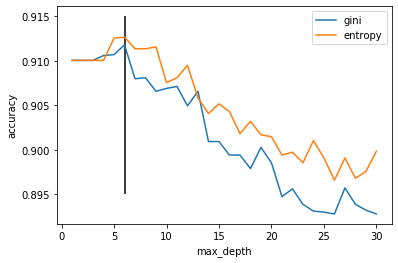

In [10]:
trees = pd.DataFrame({'acc_gini':pd.Series(acc_gini),
                     'acc_entropy':pd.Series(acc_entropy),
                     'max_depth':pd.Series(max_depth)})

plt.plot('max_depth', 'acc_gini', data=trees, label='gini')
plt.plot('max_depth', 'acc_entropy', data=trees, label='entropy')
plt.vlines(6, 0.895, 0.915)
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [11]:
# Train the decision tree using the identified hyperparameters
modelDT = DecisionTreeClassifier(criterion='gini', max_depth=6)
modelDT.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


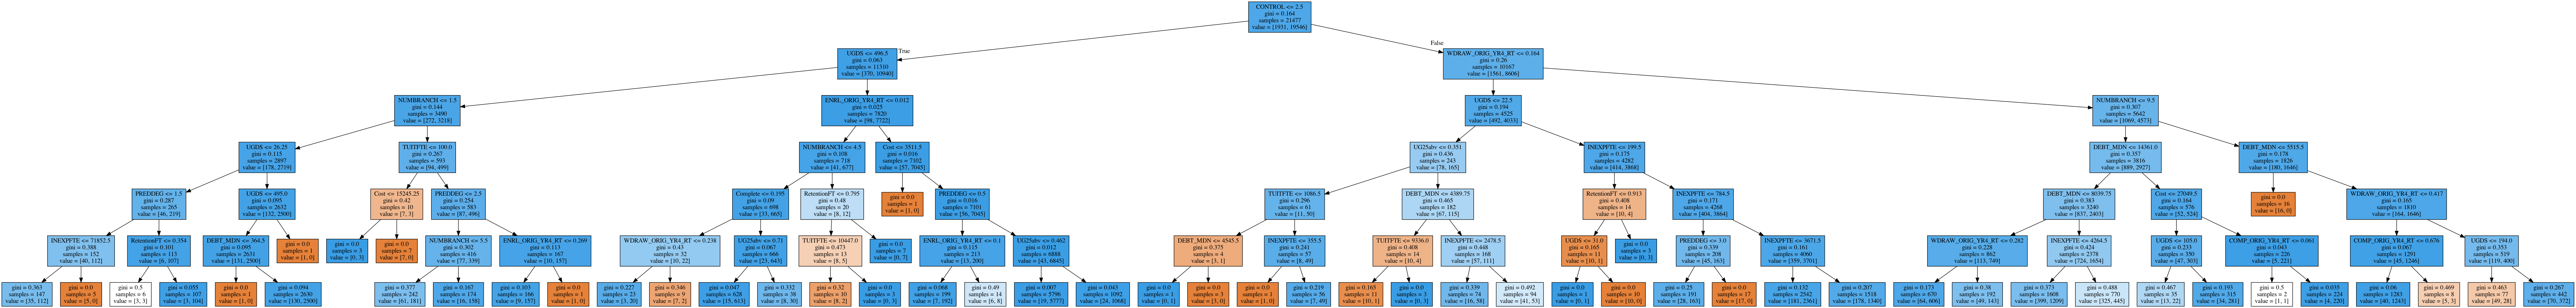

In [12]:
#from sklearn.tree import plot_tree
#plot_tree(modelDT)
# Code from https://towardsdatascience.com/decision-tree-build-prune-and-visualize-it-using-python-12ceee9af752

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(modelDT, out_file=dot_data, filled=True, feature_names=X_train.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('tree.png')
Image(graph.create_png())

[Text(167.4, 201.90857142857143, 'X[2] <= 2.5\ngini = 0.164\nsamples = 21477\nvalue = [1931, 19546]'),
 Text(83.26406250000001, 170.84571428571428, 'X[3] <= 496.5\ngini = 0.063\nsamples = 11310\nvalue = [370, 10940]'),
 Text(43.59375, 139.78285714285715, 'X[0] <= 1.5\ngini = 0.144\nsamples = 3490\nvalue = [272, 3218]'),
 Text(26.156250000000004, 108.72, 'X[3] <= 26.25\ngini = 0.115\nsamples = 2897\nvalue = [178, 2719]'),
 Text(13.950000000000001, 77.65714285714284, 'X[1] <= 1.5\ngini = 0.287\nsamples = 265\nvalue = [46, 219]'),
 Text(6.9750000000000005, 46.59428571428572, 'X[5] <= 71852.5\ngini = 0.388\nsamples = 152\nvalue = [40, 112]'),
 Text(3.4875000000000003, 15.531428571428563, 'gini = 0.363\nsamples = 147\nvalue = [35, 112]'),
 Text(10.4625, 15.531428571428563, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(20.925, 46.59428571428572, 'X[14] <= 0.354\ngini = 0.101\nsamples = 113\nvalue = [6, 107]'),
 Text(17.4375, 15.531428571428563, 'gini = 0.5\nsamples = 6\nvalue = [3, 3]'),

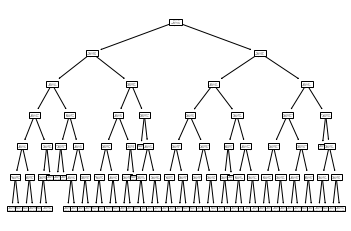

In [13]:
from sklearn.tree import plot_tree
plot_tree(modelDT)

In [14]:
# Use the trained tree to predict the testing data
dt_pred = modelDT.predict(X_test)
dt_pred_prob = modelDT.predict(X_test)

In [15]:
# Run this block for model evaluation 
#from sklearn import metrics
print("Model Metrics")
print("Accuracy:", metrics.accuracy_score(y_test, dt_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test, dt_pred))
print('Precision score for "Yes"' , metrics.precision_score(y_test, dt_pred, pos_label = 1))
print('Recall score for "No"' , metrics.recall_score(y_test, dt_pred, pos_label = 0))

Model Metrics
Accuracy: 0.9121129820749593
Balanced accuracy: 0.526710399823764
Precision score for "Yes" 0.9144578313253012
Recall score for "No" 0.05676328502415459


In [16]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, dt_pred))

[[  47  781]
 [  28 8349]]


In [17]:
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

       False       0.63      0.06      0.10       828
        True       0.91      1.00      0.95      8377

    accuracy                           0.91      9205
   macro avg       0.77      0.53      0.53      9205
weighted avg       0.89      0.91      0.88      9205



## Exploration of misclassified schools

In [18]:
result_dict = {'CURROPER':y_test, 'Predicted':dt_pred}
results = pd.DataFrame(result_dict)
results.head()

,CURROPER,Predicted
69259,True,True
51709,True,True
77410,True,True
72997,True,True
60179,True,True


In [19]:
predicted = pd.concat([X_test, results], axis=1)
predicted.head()

,NUMBRANCH,PREDDEG,CONTROL,UGDS,TUITFTE,INEXPFTE,PFTFAC,UG25abv,COMP_ORIG_YR4_RT,WDRAW_ORIG_YR4_RT,ENRL_ORIG_YR4_RT,DEBT_MDN,Cost,Complete,RetentionFT,CURROPER,Predicted
69259,1,1,3.0,95.0,13912.0,3621.0,0.7222,0.4960,0.601942,0.155340,0.0,6327.0,20760.0,0.7527,0.83085,True,True
51709,1,1,1.0,347.0,238.0,4822.0,0.9048,0.6042,0.086466,0.035971,0.0,5500.0,12920.0,0.6729,0.82110,True,True
77410,2,1,3.0,299.0,9263.0,2161.0,0.1579,0.4147,0.736895,0.102823,0.0,9500.0,26261.0,0.8056,0.78210,True,True
72997,1,2,2.0,22.0,3986.0,7500.0,0.5000,0.2273,0.328947,0.211921,0.0,9000.0,21734.0,0.4396,0.76570,True,True
60179,3,1,3.0,138.0,10137.0,2927.0,0.0909,0.7101,0.787234,0.153846,0.0,12500.0,31868.0,0.6909,0.83085,True,True


In [20]:
false_pos = predicted.loc[(predicted.Predicted == True) & (predicted.CURROPER == False)]
false_pos.shape

(781, 17)

In [21]:
false_neg = predicted.loc[(predicted.Predicted==False) & (predicted.CURROPER==True)]
false_neg.shape

(28, 17)

## Generate graphs for the report

In [22]:
predicted['Result'] = np.nan
predicted.loc[(predicted.Predicted==True)&(predicted.CURROPER==True), 'Result'] = 'TP'
predicted.loc[(predicted.Predicted==False)&(predicted.CURROPER==False), 'Result'] = 'TN'
predicted.loc[(predicted.Predicted==True)&(predicted.CURROPER==False), 'Result'] = 'FP'
predicted.loc[(predicted.Predicted==False)&(predicted.CURROPER==True), 'Result'] = 'FN'
print(predicted.Result)

69259    TP
51709    TP
77410    TP
72997    TP
60179    TP
         ..
70340    TP
68841    TN
50876    TP
57371    TP
59663    TP
Name: Result, Length: 9205, dtype: object


In [23]:
to_graph = pd.merge(predicted, data)
to_graph.head()

,NUMBRANCH,PREDDEG,CONTROL,UGDS,TUITFTE,INEXPFTE,PFTFAC,UG25abv,COMP_ORIG_YR4_RT,WDRAW_ORIG_YR4_RT,...,ADM_RATE,AVGFACSAL,PCTFLOAN,Year,NetPrice,EnrollmentBins,TuitionBins,ExpenditureBins,FacultyBins,RetentionPT
0,1,1,3.0,95.0,13912.0,3621.0,0.7222,0.4960,0.601942,0.155340,...,NaN,NaN,0.4037,2012,14059.0,small,highest,med,NaN,NaN
1,1,1,1.0,347.0,238.0,4822.0,0.9048,0.6042,0.086466,0.035971,...,NaN,NaN,0.0000,2010,6744.0,medium,low,med,NaN,1.0
2,2,1,3.0,299.0,9263.0,2161.0,0.1579,0.4147,0.736895,0.102823,...,NaN,3907.0,0.5374,2013,22140.0,medium,high,low,low,NaN
3,1,2,2.0,22.0,3986.0,7500.0,0.5000,0.2273,0.328947,0.211921,...,NaN,NaN,0.5000,2013,16115.0,small,med,high,NaN,NaN
4,3,1,3.0,138.0,10137.0,2927.0,0.0909,0.7101,0.787234,0.153846,...,NaN,5404.0,0.8444,2011,29074.0,small,highest,med,med,NaN


In [24]:
to_graph.CONTROL = to_graph.CONTROL.astype('str')
to_graph.CONTROL.loc[to_graph.CONTROL == '1.0'] = 'Public'
to_graph.CONTROL.loc[to_graph.CONTROL == '2.0'] = 'NonProfit'
to_graph.CONTROL.loc[to_graph.CONTROL == '3.0'] = 'ForProfit'

to_graph.PREDDEG = to_graph.PREDDEG.astype('str')
#to_graph.drop(['EnrollmentBins', 'TuitionBins', 'ExpenditureBins', 'FacultyBins'], axis=1, inplace=True)
to_graph.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10306 entries, 0 to 10305
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   NUMBRANCH          10306 non-null  int64  
 1   PREDDEG            10306 non-null  object 
 2   CONTROL            10306 non-null  object 
 3   UGDS               10306 non-null  float64
 4   TUITFTE            10306 non-null  float64
 5   INEXPFTE           10306 non-null  float64
 6   PFTFAC             10306 non-null  float64
 7   UG25abv            10306 non-null  float64
 8   COMP_ORIG_YR4_RT   10306 non-null  float64
 9   WDRAW_ORIG_YR4_RT  10306 non-null  float64
 10  ENRL_ORIG_YR4_RT   10306 non-null  float64
 11  DEBT_MDN           10306 non-null  float64
 12  Cost               10306 non-null  float64
 13  Complete           10306 non-null  float64
 14  RetentionFT        10306 non-null  float64
 15  CURROPER           10306 non-null  bool   
 16  Predicted          103

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [25]:
predControl = to_graph.pivot_table(index='PREDDEG', columns=['CONTROL','Result'], aggfunc='size')
print(predControl)

CONTROL ForProfit                      NonProfit                    Public  \
Result         FN     FP    TN      TP        FN    FP   TN      TP     FN   
PREDDEG                                                                      
0             3.0   84.0   3.0  1229.0       1.0   9.0  NaN   217.0    NaN   
1             6.0  453.0   4.0  2534.0       4.0  48.0  1.0   213.0    NaN   
2             NaN   85.0   1.0   588.0       2.0  11.0  NaN   161.0    3.0   
3             6.0   29.0   9.0   286.0       3.0  31.0  1.0  1440.0    NaN   
4             NaN    2.0  18.0    30.0       NaN  13.0  1.0   292.0    NaN   

CONTROL                    
Result     FP   TN     TP  
PREDDEG                    
0         6.0  NaN  105.0  
1        31.0  5.0  716.0  
2         8.0  4.0  899.0  
3         3.0  NaN  690.0  
4         1.0  NaN   17.0  


In [26]:
false_neg = to_graph.loc[to_graph.Result == 'FN']
false_neg.head()

,NUMBRANCH,PREDDEG,CONTROL,UGDS,TUITFTE,INEXPFTE,PFTFAC,UG25abv,COMP_ORIG_YR4_RT,WDRAW_ORIG_YR4_RT,...,ADM_RATE,AVGFACSAL,PCTFLOAN,Year,NetPrice,EnrollmentBins,TuitionBins,ExpenditureBins,FacultyBins,RetentionPT
536,78,0,ForProfit,57.0,9878.5,2834.5,0.3333,0.5088,0.201995,0.447498,...,NaN,NaN,NaN,2011,21087.5,small,NaN,NaN,NaN,NaN
606,9,1,NonProfit,1031.0,163.0,1736.0,0.7500,0.5315,0.480461,0.000000,...,NaN,NaN,0.0000,2013,7431.0,large,low,low,NaN,NaN
837,1,1,ForProfit,78.0,6729.0,189.0,0.7222,0.8333,0.760870,0.000000,...,NaN,NaN,0.8120,2013,14059.0,small,high,low,NaN,NaN
910,71,3,ForProfit,20.0,12218.0,3732.0,0.4118,0.8500,0.188030,0.464499,...,NaN,NaN,0.6786,2013,19954.0,small,highest,med,NaN,NaN
2747,1,0,NonProfit,14.0,18613.0,75958.0,0.2353,0.2143,0.000000,0.000000,...,NaN,NaN,0.0000,2012,22437.0,small,highest,highest,NaN,NaN


## UGDS - Undergraduate enrollment

Text(0.5, 1.0, 'Enrollment by Control')

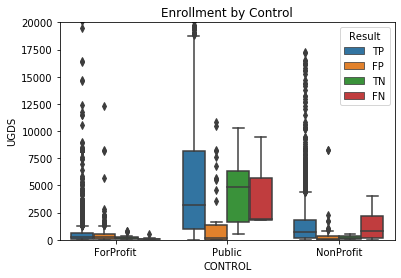

In [27]:
sns.boxplot('CONTROL', 'UGDS', data = to_graph, hue = 'Result')
plt.ylim(0, 20000)
plt.title('Enrollment by Control')

Text(0.5, 1.0, 'Enrollment by Degree Type')

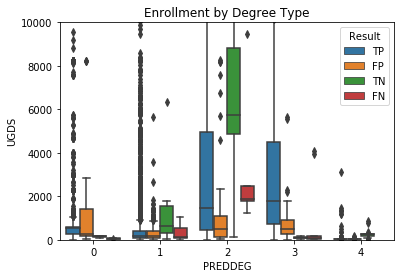

In [28]:
sns.boxplot('PREDDEG', 'UGDS', data = to_graph, hue = 'Result')
plt.ylim(0, 10000)
plt.title('Enrollment by Degree Type')

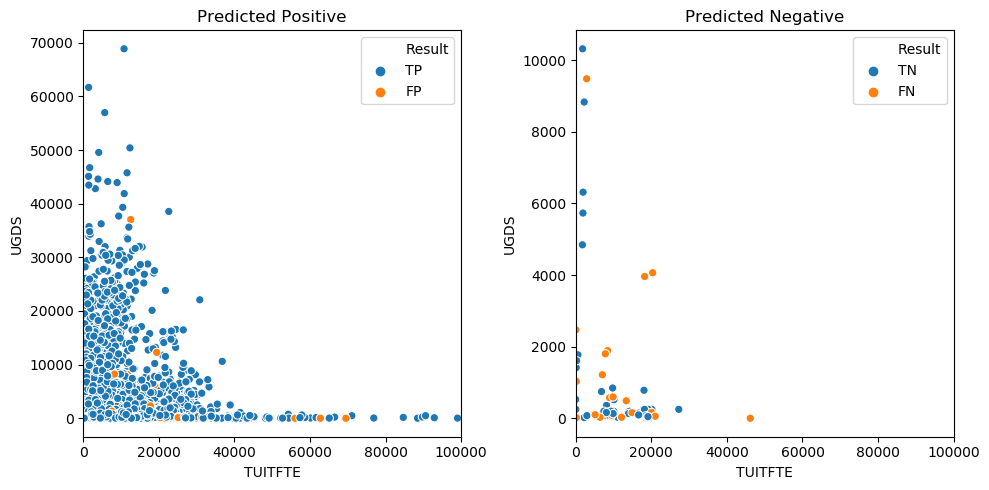

In [29]:
fig=plt.figure(figsize=(10,5), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
sns.scatterplot('TUITFTE', 'UGDS', data=to_graph.loc[to_graph.Predicted==True], hue = 'Result')
plt.title('Predicted Positive')
plt.xlim(0,100000)
#plt.ylim(0,40000)

plt.subplot(1, 2, 2)
sns.scatterplot('TUITFTE', 'UGDS', data=to_graph.loc[to_graph.Predicted==False], hue = 'Result')
plt.title('Predicted Negative')
plt.xlim(0,100000)
#plt.ylim(0,40000)
plt.tight_layout()
plt.show()

## Tuition and Cost

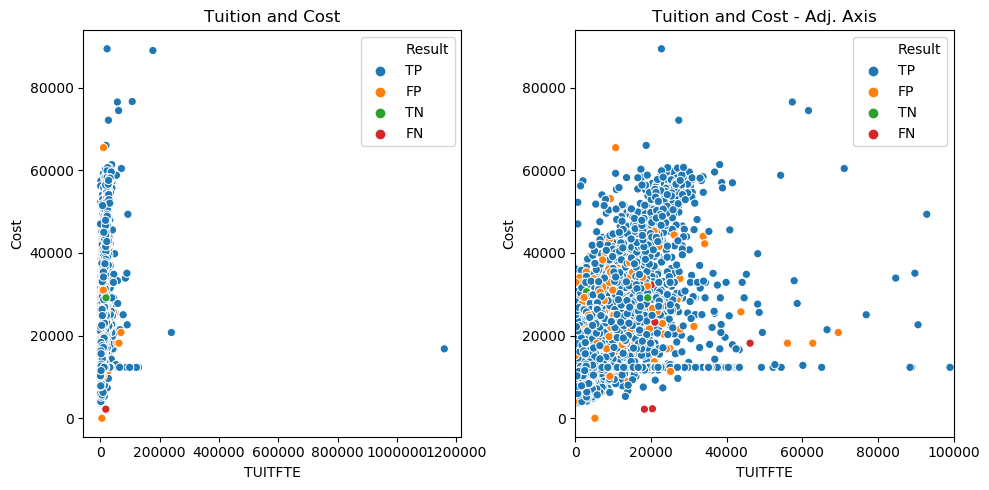

In [30]:
fig=plt.figure(figsize=(10,5), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
sns.scatterplot('TUITFTE', 'Cost', data=to_graph, hue = 'Result')
plt.title('Tuition and Cost')

plt.subplot(1, 2, 2)
sns.scatterplot('TUITFTE', 'Cost', data=to_graph, hue = 'Result')
plt.xlim(0, 100000)
plt.title('Tuition and Cost - Adj. Axis')
plt.tight_layout()
plt.show()

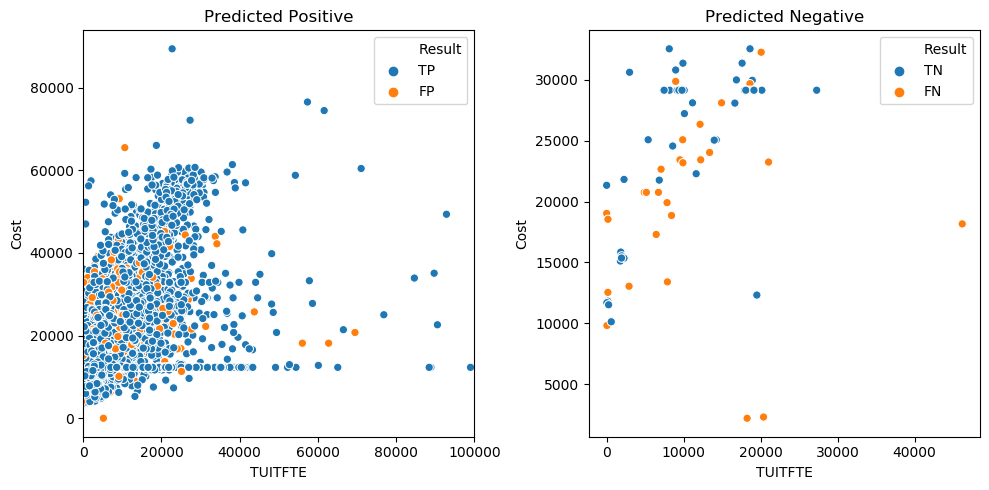

In [31]:
fig=plt.figure(figsize=(10,5), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
sns.scatterplot('TUITFTE', 'Cost', data=to_graph.loc[to_graph.Predicted==True], hue = 'Result')
plt.title('Predicted Positive')
plt.xlim(0,100000)

plt.subplot(1, 2, 2)
sns.scatterplot('TUITFTE', 'Cost', data=to_graph.loc[to_graph.Predicted==False], hue = 'Result')
plt.title('Predicted Negative')
plt.tight_layout()
plt.show()

## Cost and Debt

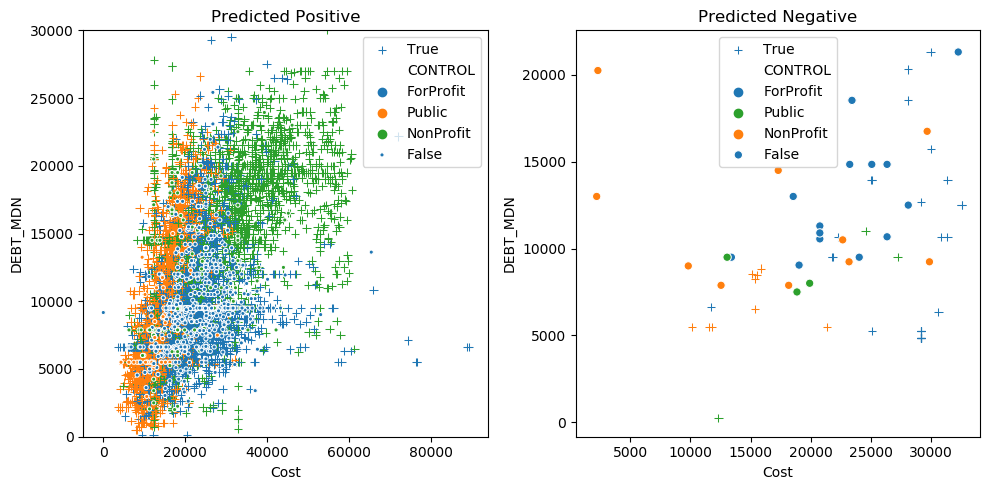

In [41]:
fig=plt.figure(figsize=(10,5), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
#sns.scatterplot('Cost', 'DEBT_MDN', data=to_graph.loc[to_graph.Predicted==True], hue='CONTROL')
sns.scatterplot('Cost', 'DEBT_MDN', data=to_graph.loc[to_graph.Result=='TP'], hue='CONTROL', marker='+', label='True')
sns.scatterplot('Cost', 'DEBT_MDN', data=to_graph.loc[to_graph.Result=='FP'], hue='CONTROL', marker='.', label='False')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.title('Predicted Positive')
plt.ylim(0,30000)

plt.subplot(1, 2, 2)
sns.scatterplot('Cost', 'DEBT_MDN', data=to_graph.loc[to_graph.Result=='TN'], hue='CONTROL', marker='+', label='True')
sns.scatterplot('Cost', 'DEBT_MDN', data=to_graph.loc[to_graph.Result=='FN'], hue='CONTROL', marker='o', label='False')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.title('Predicted Negative')
plt.tight_layout()
plt.show()

## NumBranch

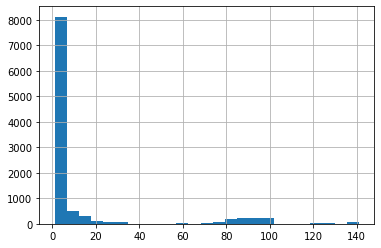

In [34]:
to_graph.NUMBRANCH.hist(bins=25)

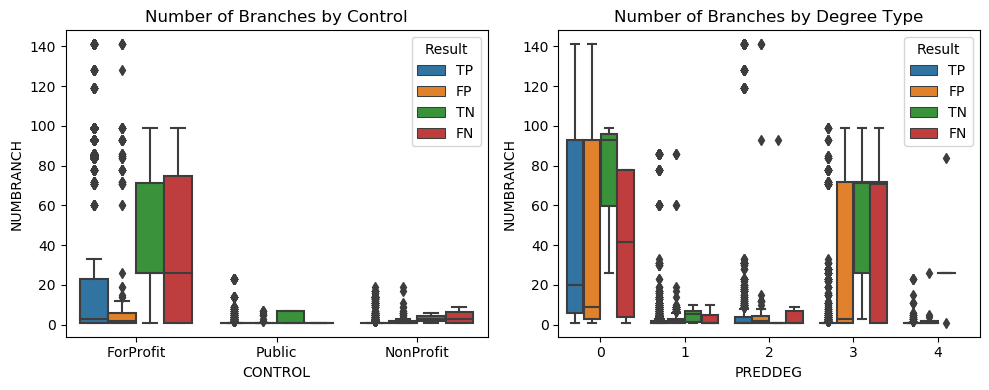

In [35]:
fig=plt.figure(figsize=(10,4), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
sns.boxplot('CONTROL', 'NUMBRANCH', data = to_graph, hue = 'Result')
#plt.ylim(0, 100)
plt.title('Number of Branches by Control')

plt.subplot(1, 2, 2)
sns.boxplot('PREDDEG', 'NUMBRANCH', data = to_graph, hue = 'Result')
#plt.ylim(0, 100)
plt.title('Number of Branches by Degree Type')
plt.tight_layout()
plt.show()

True Negatives had between 25-70 branches (ForProfit), while True Positives generally had less than 20 branches (for all control types). ForProfit False Negatives fit the range for the true positives (<75 branches), (but there are only 28 false negatives, so I suspect this observation is an artifact of sample size, not a true effect.)

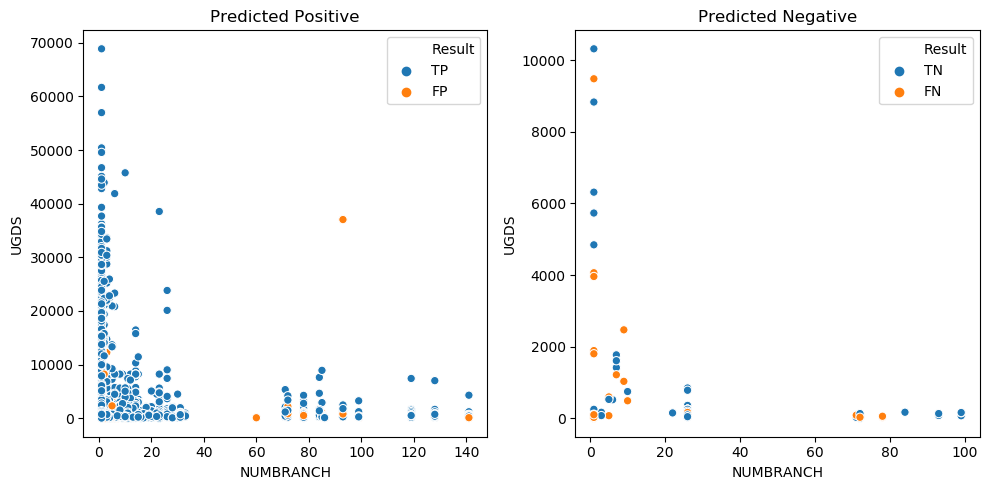

In [36]:
fig=plt.figure(figsize=(10,5), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
sns.scatterplot('NUMBRANCH', 'UGDS', data=to_graph.loc[to_graph.Predicted==True], hue = 'Result')
plt.title('Predicted Positive')

plt.subplot(1, 2, 2)
sns.scatterplot('NUMBRANCH', 'UGDS', data=to_graph.loc[to_graph.Predicted==False], hue = 'Result')
plt.title('Predicted Negative')
plt.tight_layout()
plt.show()

## Instructional Expenditure

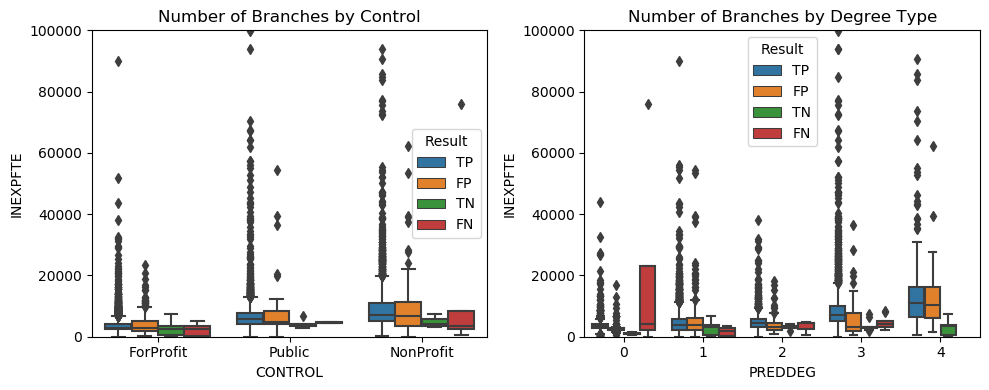

In [37]:
fig=plt.figure(figsize=(10,4), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
sns.boxplot('CONTROL', 'INEXPFTE', data = to_graph, hue = 'Result')
plt.ylim(0, 100000)
plt.title('Number of Branches by Control')

plt.subplot(1, 2, 2)
sns.boxplot('PREDDEG', 'INEXPFTE', data = to_graph, hue = 'Result')
plt.ylim(0, 100000)
plt.title('Number of Branches by Degree Type')
plt.tight_layout()
plt.show()

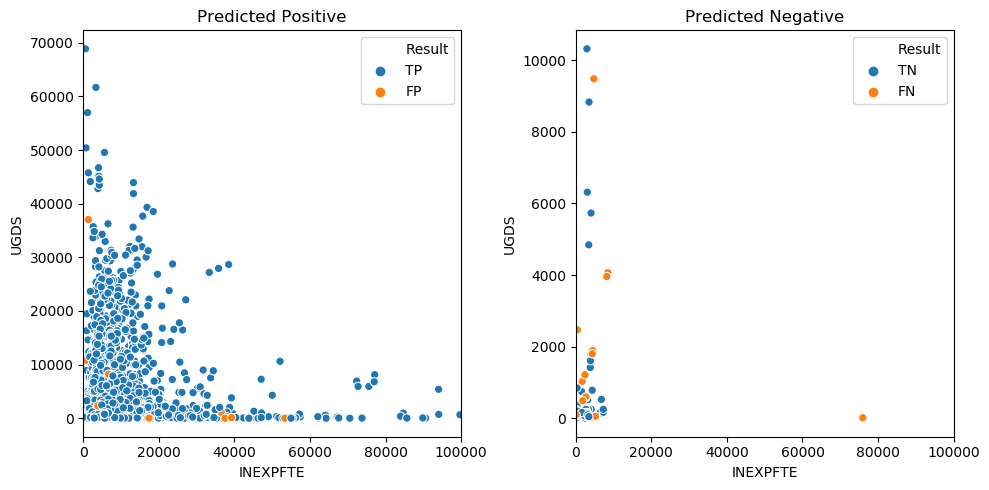

In [38]:
fig=plt.figure(figsize=(10,5), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
sns.scatterplot('INEXPFTE', 'UGDS', data=to_graph.loc[to_graph.Predicted==True], hue = 'Result')
plt.xlim(0, 100000)
plt.title('Predicted Positive')

plt.subplot(1, 2, 2)
sns.scatterplot('INEXPFTE', 'UGDS', data=to_graph.loc[to_graph.Predicted==False], hue = 'Result')
plt.xlim(0, 100000)
plt.title('Predicted Negative')
plt.tight_layout()
plt.show()

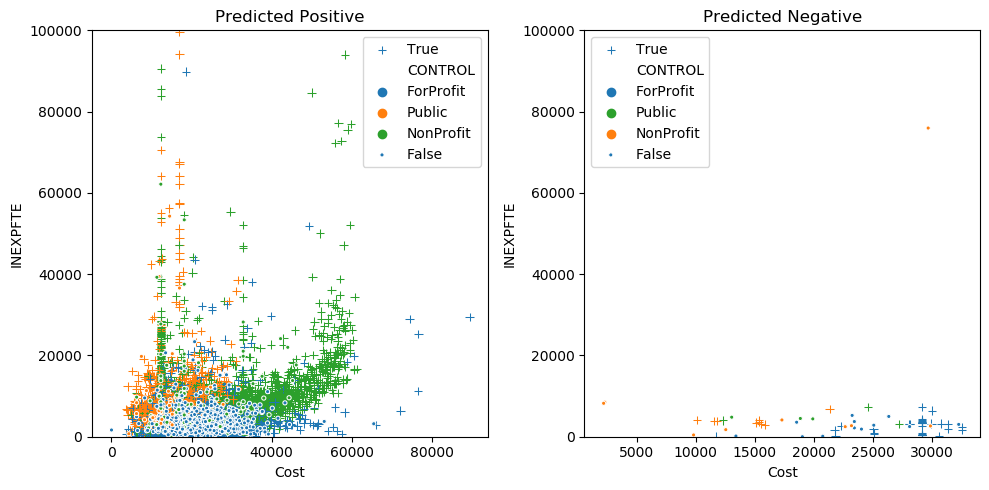

In [45]:
fig=plt.figure(figsize=(10,5), dpi= 100, facecolor='w', edgecolor='k')
plt.subplot(1, 2, 1)
#sns.scatterplot('INEXPFTE', 'Cost', data=to_graph.loc[to_graph.Predicted==True], hue = 'Result')
sns.scatterplot('Cost', 'INEXPFTE', data=to_graph.loc[to_graph.Result=='TP'], hue='CONTROL', marker='+', label='True')
sns.scatterplot('Cost', 'INEXPFTE', data=to_graph.loc[to_graph.Result=='FP'], hue='CONTROL', marker='.', label='False')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.ylim(0, 100000)
plt.title('Predicted Positive')

plt.subplot(1, 2, 2)
#sns.scatterplot('INEXPFTE', 'Cost', data=to_graph.loc[to_graph.Predicted==False], hue = 'Result')
sns.scatterplot('Cost', 'INEXPFTE', data=to_graph.loc[to_graph.Result=='TN'], hue='CONTROL', marker='+', label='True')
sns.scatterplot('Cost', 'INEXPFTE', data=to_graph.loc[to_graph.Result=='FN'], hue='CONTROL', marker='.', label='False')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.ylim(0, 100000)
plt.title('Predicted Negative')
plt.tight_layout()
plt.show()